In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from statsmodels import robust

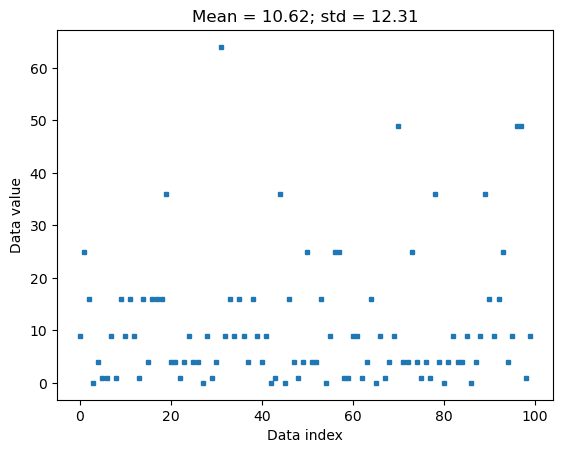

In [2]:
# z-scores

# create data
data = np.random.poisson(3,100)**2

# compute the mean and standard deviation
datamean = np.mean(data)
datastd = np.std(data,ddof=1) # use the correct degrees of freed ddof=1 for unbiased variance


plt.plot(data,'s',markersize=3)
plt.xlabel('Data index')
plt.ylabel('Data value')
plt.title(f'Mean = {np.round(datamean,2)}; std = {np.round(datastd,2)}')

plt.show()

Text(0.5, 1.0, 'Mean = 10.62; std = 12.31')

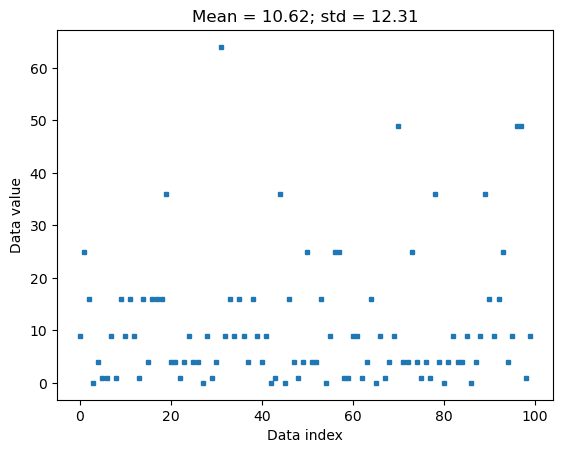

In [3]:
# z-scoring

# manually write out the formula for z-score
dataz_manual = (data-datamean / datastd)

# use Python function for z-score
dataz = stats.zscore(data)

# compute the mean and standard deviation of the z-transformed data
# ** Remember: the purpose of the z-score is to normalize the data in terms of std to compare different data sets
dataZmean = np.mean(dataz_manual)
dataZstd = np.std(dataz_manual, ddof=1) # set the degrees of freedom equal to 1 for an unbiased variance 


# plot the data
plt.plot(data,'s',markersize=3)
plt.xlabel('Data index')
plt.ylabel('Data value')
plt.title(f'Mean = {np.round(datamean,2)}; std = {np.round(datastd,2)}')

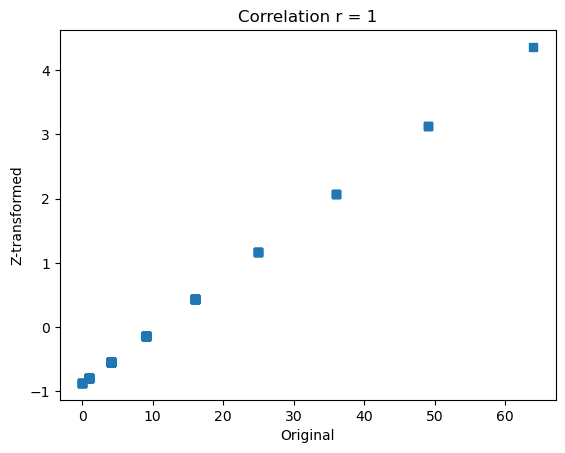

In [4]:
## show that the relative values are preserved
plt.plot(data,dataz,'s')
plt.xlabel('Original')
plt.ylabel('Z-transformed')
plt.title('Correlation r = %g'%np.corrcoef(data,dataz)[0,0])
plt.show()

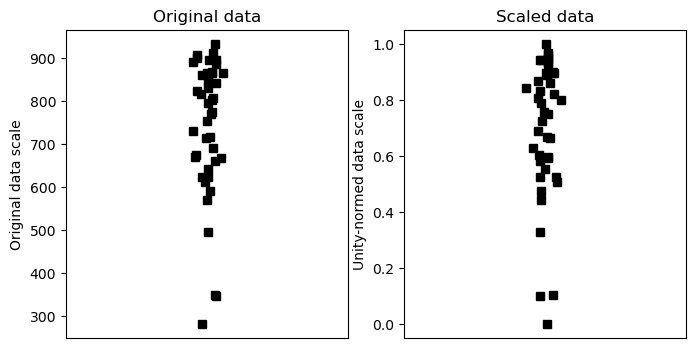

In [5]:
# min-max scaling
## create some data

N = 42
data = np.log(np.random.rand(N))*234 + 934

# get min and max
dataMin = min(data)
dataMax = max(data)

# now min-max scale
dataS = (data-dataMin) / (dataMax-dataMin)


# now plot
fig,ax = plt.subplots(1,2,figsize=(8,4))
ax[0].plot(1+np.random.randn(N)/20,data,'ks')
ax[0].set_xlim([0,2])
ax[0].set_xticks([])
ax[0].set_ylabel('Original data scale')
ax[0].set_title('Original data')

ax[1].plot(1+np.random.randn(N)/20,dataS,'ks')
ax[1].set_xlim([0,2])
ax[1].set_xticks([])
ax[1].set_ylabel('Unity-normed data scale')
ax[1].set_title('Scaled data')

plt.show()

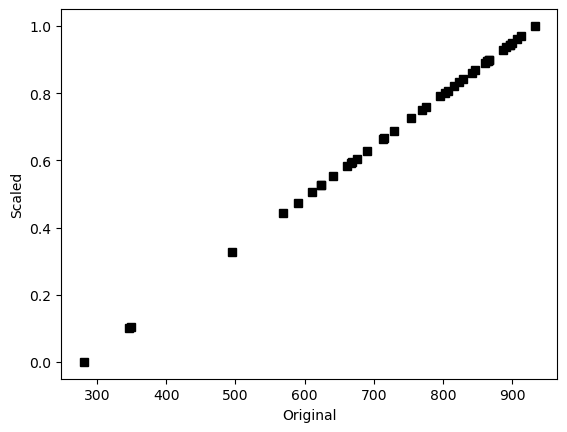

In [6]:
# min-max scaling
## show that scaling doesn't affect the relative values

plt.plot(data,dataS,'ks')
plt.xlabel('Original')
plt.ylabel('Scaled')
plt.show()

In [7]:
## any abitrary data range

# step 1 is to [0,1] normalize as above

# step 2:
newMin = 4
newMax = 8.7

dataSS = dataS*(newMax-newMin) + newMin

# test it!
print([min(dataSS), max(dataSS)])

[4.0, 8.7]


In [ ]:
## exercise to deal with outliers

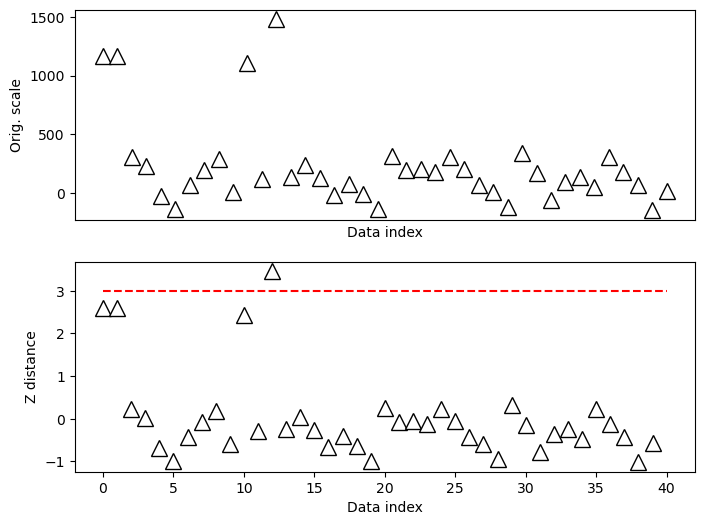

In [8]:
## exercise to deal with outliers
## create some data

N = 40
data = np.random.randn(N)
data[data<-1] = data[data<-1]+2
data[data>2] = data[data>2]**2; # try to force a few outliers
data = data*200 + 50  # change the scale for comparison with z

# convert to z
dataZ = (data-np.mean(data)) / np.std(data)


#### specify the z-score threshold
zscorethresh = 3



# plot the data
fig,ax = plt.subplots(2,1,figsize=(8,6))

ax[0].plot(data,'k^',markerfacecolor='w',markersize=12)
ax[0].set_xticks([])
ax[0].set_xlabel('Data index')
ax[0].set_ylabel('Orig. scale')

# then plot the zscores
ax[1].plot(dataZ,'k^',markerfacecolor='w',markersize=12)
ax[1].plot([0,N],[zscorethresh,zscorethresh],'r--')
ax[1].set_xlabel('Data index')
ax[1].set_ylabel('Z distance')
plt.show()

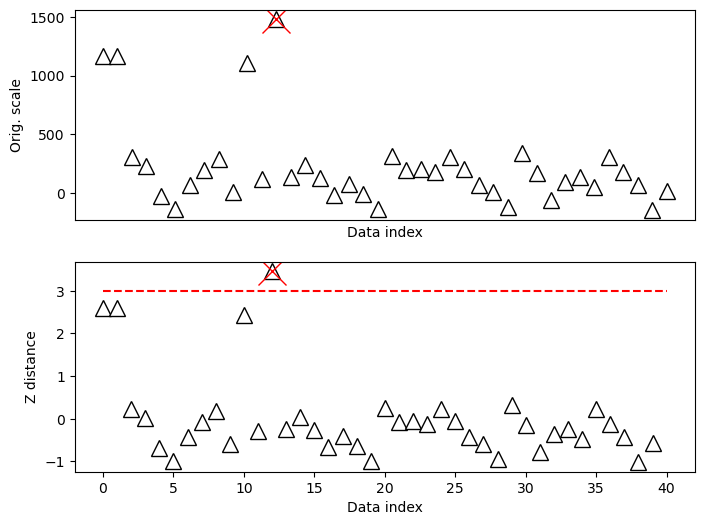

In [9]:
## exercise to deal with outliers
## identify outliers

# find 'em!
outliers = np.where(abs(dataZ)>zscorethresh)[0]

# and cross those out
ax[0].plot(outliers,data[outliers],'x',color='r',markersize=20)
ax[1].plot(outliers,dataZ[outliers],'x',color='r',markersize=20)

fig

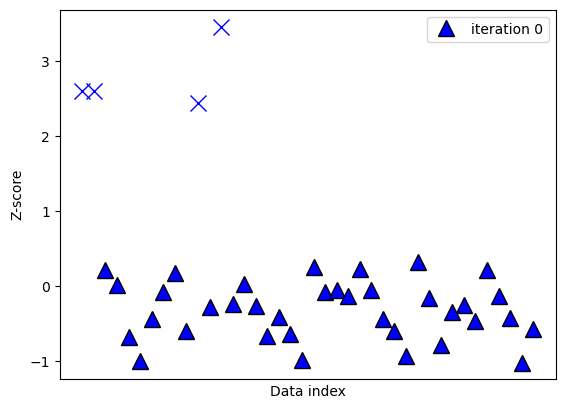

[ 0  1 10 12]


In [11]:
## iterative method to remove outliers

# pick a lenient threshold just for illustration
zscorethresh = 2
dataZ = (data-np.mean(data)) / np.std(data)


colorz = 'brkm'
numiters = 0 # iteration counter
while True:
    
    # convert to z
    datamean = np.nanmean(dataZ)
    datastd  = np.nanstd(dataZ)
    dataZ = (dataZ-datamean) / datastd
    
    # find data values to remove
    toremove = dataZ>zscorethresh
    
    # break out of while loop if no points to remove
    if sum(toremove)==0:
        break
    else:
        # otherwise, mark the outliers in the plot
        plt.plot(np.where(toremove)[0],dataZ[toremove],'%sx'%colorz[numiters],markersize=12)
        dataZ[toremove] = np.nan
    
    # replot
    plt.plot(dataZ,'k^',markersize=12,markerfacecolor=colorz[numiters],label='iteration %g'%numiters)
    numiters = numiters + 1

plt.xticks([])
plt.ylabel('Z-score')
plt.xlabel('Data index')
plt.legend()
plt.show()

#### the data points to be removed
removeFromOriginal = np.where(np.isnan(dataZ))[0]
print(removeFromOriginal)

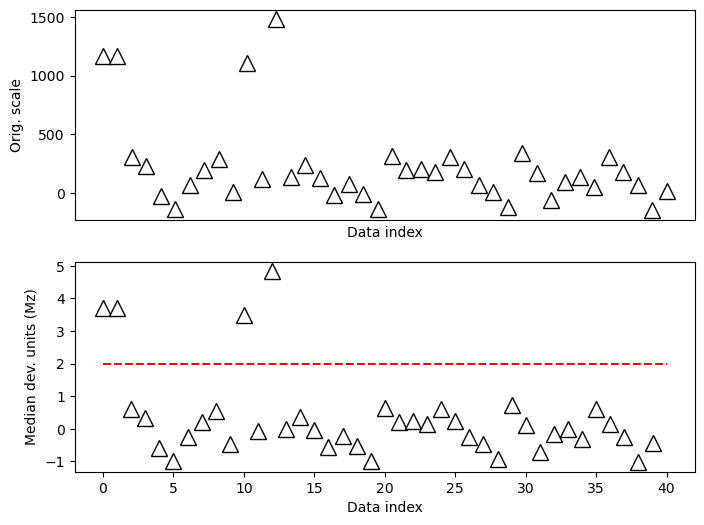

In [12]:
## modified Z for non-normal distributions to remove outliers

# compute modified z
dataMed = np.median(data)
dataMAD = robust.mad(data)

dataMz = stats.norm.ppf(.75)*(data-dataMed) / dataMAD


# plot the data
fig,ax = plt.subplots(2,1,figsize=(8,6))

ax[0].plot(data,'k^',markerfacecolor='w',markersize=12)
ax[0].set_xticks([])
ax[0].set_xlabel('Data index')
ax[0].set_ylabel('Orig. scale')

# then plot the zscores
ax[1].plot(dataMz,'k^',markerfacecolor='w',markersize=12)
ax[1].plot([0,N],[zscorethresh,zscorethresh],'r--')
ax[1].set_xlabel('Data index')
ax[1].set_ylabel('Median dev. units (Mz)')
plt.show()

In [ ]:
## multivariate outlier detection